In [2]:
import os
import pandas as pd
import numpy as np
import json
from google.colab import files
import io
from keras import layers
from keras import models
from keras import applications
from keras import optimizers
import keras

Using TensorFlow backend.


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Please change the path to the desired video to be tested.


In [0]:
i=1
path='/content/drive/My Drive/results data/newdata/15-3-152.json'
#path='/content/1'
json_files=[pos_json for pos_json in os.listdir(path) if pos_json.endswith('.json')]
print('Found: ',len(json_files),'json keypoint frame files')
a=json.load(open(path+'/'+json_files[0]))
b=a['people']
q=b[0]['pose_keypoints_2d']
s=[p for p in q if p>1]
train=pd.DataFrame([s])
for j in range(1,len(json_files)):
    a=json.load(open(path+'/'+json_files[j]))
    b=a['people']
    if len(b)>0:

        q=b[0]['pose_keypoints_2d']
        s=[p for p in q if p>1]
        s=pd.DataFrame([s])
        train=train.append(s)
    else:
        continue

Found:  1823 json keypoint frame files


In [0]:


train=train.fillna(method='ffill')
train=train.fillna(0)
y,x=train.shape
s=np.zeros(y)
s=pd.DataFrame(s)

for i in range(50):
    y,x=train.shape
    if x!=50:
        train[x]=s
        x=x+1
    if y<90:
        train=train.append(train.iloc[y-1])

for i in range(50):
    train.iloc[:,i]=train.iloc[:,i]/train.iloc[:,i].max()

In [0]:
train=train.fillna(method='ffill')
train=train.fillna(0)
train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,0.907835,0.762473,0.796227,0.675685,0.587301,0.808560,0.750084,0.836524,0.923986,0.862757,0.508455,0.506010,0.785318,0.371142,0.809598,0.271978,0.739412,0.767073,0.574821,0.807589,0.696137,0.762679,0.529722,0.607881,0.680928,0.592089,0.290776,0.798315,0.284096,0.740023,0.278050,0.864501,0.262925,0.661517,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
0,0.878821,0.762615,0.808043,0.675669,0.595801,0.801548,0.760561,0.840030,0.914247,0.866039,0.508393,0.505951,0.764477,0.371375,0.805000,0.254107,0.643280,0.758583,0.492749,0.803398,0.792544,0.528945,0.780851,0.515710,0.499324,0.657367,0.289163,0.798360,0.276093,0.744136,0.284367,0.836118,0.256587,0.661625,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
0,0.907750,0.770655,0.792218,0.668165,0.587279,0.801451,0.721443,0.836441,0.916694,0.866047,0.508300,0.502197,0.754021,0.371252,0.791530,0.253990,0.660372,0.771337,0.492766,0.852545,0.505024,0.613313,0.284985,0.753918,0.286618,0.751179,0.279410,0.876557,0.248983,0.677940,0.284367,0.836118,0.256587,0.661625,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
0,0.907699,0.791288,0.796125,0.671923,0.590088,0.801451,0.757901,0.847162,0.926442,0.866096,0.508264,0.502238,0.743591,0.371326,0.795989,0.250454,0.767163,0.716265,0.574844,0.795215,0.640582,0.781875,0.747249,0.788523,0.587668,0.583963,0.774432,0.596913,0.282491,0.826588,0.273347,0.774631,0.248557,0.661551,0.757450,0.774604,0.754389,0.780871,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
0,0.893404,0.766805,0.792224,0.671930,0.590012,0.805123,0.744949,0.843636,0.926483,0.869501,0.508286,0.498397,0.754005,0.367442,0.796035,0.254070,0.777838,0.724765,0.594532,0.795136,0.800692,0.785643,0.971191,0.803932,0.595834,0.583966,0.784142,0.605052,0.877213,0.549947,0.274889,0.803374,0.272462,0.730110,0.266130,0.812201,0.242767,0.630989,0.960796,0.781369,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.825323,0.733818,0.792154,0.675676,0.604100,0.808510,0.755335,0.854185,0.941158,0.886187,0.505612,0.505940,0.722684,0.404801,0.796028,0.416870,0.645432,0.767033,0.267859,0.828002,0.263280,0.686043,0.273767,0.788520,0.253855,0.669751,0.707870,0.572206,0.786339,0.558204,0.256114,0.758150,0.247018,0.677730,0.253725,0.770948,0.241255,0.623185,0.781862,0.554936,0.773991,0.883334,0.777983,0.891019,0.930534,0.890454,0.974551,0.912003,0.960153,1.0
0,0.835266,0.750335,0.776216,0.653086,0.587285,0.790887,0.583506,0.829329,0.456127,0.451745,0.746205,0.407915,0.934508,0.401218,0.789196,0.594457,0.752228,0.783979,0.661801,0.791142,0.784347,0.808502,0.555301,0.561715,0.741461,0.514591,0.802008,0.518751,0.264973,0.830670,0.256122,0.737726,0.286771,0.818680,0.239722,0.616918,0.241255,0.623185,0.781862,0.554936,0.773991,0.883334,0.777983,0.891019,0.930534,0.890454,0.974551,0.912003,0.960153,1.0
0,0.830071,0.733930,0.808033,0.671918,0.606906,0.808688,0.765768,0.843622,0.938736,0.866287,0.508308,0.502173,0.738246,0.405071,0.823206,0.355416,0.741524,0.699295,0.569913,0.737838,0.637330,0.743440,0.771254,0.780836,0.568038,0.596184,0.792259,0.547618,0.784708,0.541708,0.260825,0.782719,0.253387,0.701834,0.261481,0.797289,0.241204,0.627318,0.781862,0.554936,0.773991,0.883334,0.777983,0.891019,0.930534,0.890454,0.974551,0.912003,0.960153,1.0
0,0.864053,0.766702,0.804100,0.675681,0.595629,0.815711,0.760501,0.847034,0.936

In [0]:
x,y=train.shape
train=train.iloc[:1800,0:3]
train=train.values
train=train.reshape(40,45,30)

In [16]:
import tensorflow as tf


model1=tf.keras.models.load_model('/content/wtsconvlstm.h5')
model2=tf.keras.models.load_model('/content/wtsfinal.h5')


Text(0, 0.5, 'action')

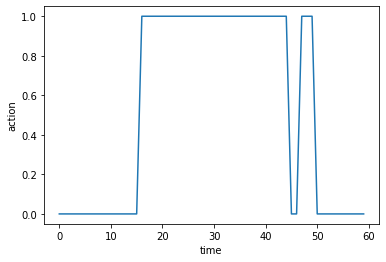

In [57]:
import tensorflow as tf
model=tf.keras.models.load_model('/content/wtsconvlstm.h5')
train=train.reshape(40,45,30)
y1=model.predict([train,train])
q1=y1.flatten()
p=[]
for i in q1:
    if i<=0.5:
        p.append(0)
        #print(0)
    else:
        p.append(1)
        #print(1)
len(p)
d=[]
from statistics import mode
for i in range(1,61):
    j=i-1
    try:
        w=mode(p[j*30:i*30])
    except:
        w=0
    d.append(w)
import matplotlib.pyplot as plt 
plt.plot(d)
plt.xlabel('time')
plt.ylabel('action')
#plt.xticks(np.arange(0,60,1))

Text(0, 0.5, 'action')

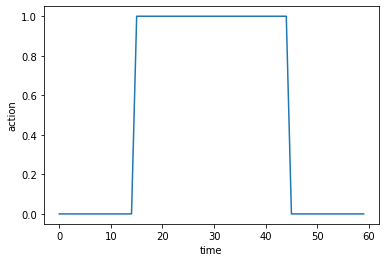

In [59]:
import tensorflow as tf
model=tf.keras.models.load_model('/content/wtsfinal.h5')
train=train.reshape(40,45,30)
y3=model.predict(train)
q1=y3.flatten()
p=[]
for i in q1:
    if i<0.4:
        p.append(0)
        #print(0)
    else:
        p.append(1)
        #print(1)
len(p)
d=[]
from statistics import mode
for i in range(1,61):
    j=i-1
    try:
        w=mode(p[j*30:i*30])
    except:
        w=0
    d.append(w)
import matplotlib.pyplot as plt 
plt.plot(d)
plt.xlabel('time')
plt.ylabel('action')


Text(0, 0.5, 'action')

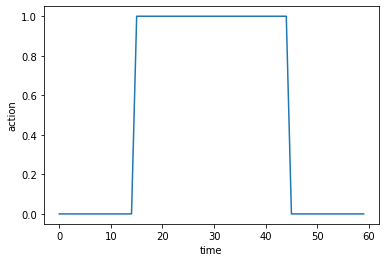

In [65]:
g=(y1+y3)/2
q=g.flatten()
p=[]
d=[]

for i in q:
    if i<0.50:
        p.append(0)
        #print(0)
    else:
        p.append(1)
        #print(1)
len(p)
from statistics import mode
for i in range(1,61):
    j=i-1
    try:
        w=mode(p[j*30:i*30])
    except:
        w=0
    d.append(w)


import matplotlib.pyplot as plt 
plt.plot(d)
plt.xlabel('time')
plt.ylabel('action')
#plt.xticks(np.arange(0,60,1))

In [0]:
b=[]
from statistics import mean
for i in range(1,61):
    j=i-1
    b.append(mean(q[j*30:i*30]))
s=[]
for i in range(len(b)):
    s.append([i,float(b[i])])

In [0]:
q=json.dumps(s)
with open('/content/timelabelvideo2.json','w') as outfile:
    outfile.write(q)

In [68]:
q

'[[0, 0.038482874631881714], [1, 0.027186773717403412], [2, 0.017491361126303673], [3, 0.15413714945316315], [4, 0.06285107880830765], [5, 0.0031158237252384424], [6, 0.04768388718366623], [7, 0.10659784078598022], [8, 0.033447835594415665], [9, 0.03579968959093094], [10, 0.054749514907598495], [11, 0.003683030605316162], [12, 0.08031640201807022], [13, 0.09119092673063278], [14, 0.07335798442363739], [15, 0.7892459630966187], [16, 0.9549391269683838], [17, 0.9936030507087708], [18, 0.9313217401504517], [19, 0.9661892056465149], [20, 0.9967440962791443], [21, 0.9674924612045288], [22, 0.9774431586265564], [23, 0.9967583417892456], [24, 0.971062958240509], [25, 0.9711182117462158], [26, 0.9970927238464355], [27, 0.9645870923995972], [28, 0.9739898443222046], [29, 0.9978516101837158], [30, 0.9327020645141602], [31, 0.9139212369918823], [32, 0.9253741502761841], [33, 0.974126398563385], [34, 0.9668354392051697], [35, 0.9975414872169495], [36, 0.930778980255127], [37, 0.9631938338279724], 